<a href="https://colab.research.google.com/github/niikun/DL_for_health_care/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab1
この最初のラボでは、Tensors、Loss、Autogradを含むPyTorchの基礎を紹介します。うまくいけば、PyTorchに慣れ始めるでしょう。最後に、いくつかの合成データを使ってsratchから線形回帰モデルを実装します。
Table of Contents
- Tensors
- Loss
- Autograd
- Assignment


In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#set seed
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
os.environ["PYTHONHASHSEED"]=str(seed)

## Tensor

### 1.1 Initializing Tensor

- Directly from data

In [3]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

- from a numpy array

In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

- from another tensor

In [5]:
x_ones = torch.ones_like(x_data)
print(f"ones tensor :\n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"random tensor :\n {x_rand} \n")

ones tensor :
 tensor([[1, 1],
        [1, 1]]) 

random tensor :
 tensor([[0.8823, 0.9150],
        [0.3829, 0.9593]]) 



- with random or constant values:

In [6]:
shape = (2,3)
rand_tensor=torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"random tensor :\n {rand_tensor} \n")
print(f"ones tensor :\n {ones_tensor} \n")
print(f"zeros tensor \n {zeros_tensor}\n")

random tensor :
 tensor([[0.3904, 0.6009, 0.2566],
        [0.7936, 0.9408, 0.1332]]) 

ones tensor :
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

zeros tensor 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])



### 1.2 Attributes of a tensor

In [7]:
tensor = torch.rand(3,4)
print(f"shape of tensor : {tensor.shape}")
print(f"data type of tensor : {tensor.dtype}")
print(f"device tensor is stored on : {tensor.device}")

shape of tensor : torch.Size([3, 4])
data type of tensor : torch.float32
device tensor is stored on : cpu


### 1.3 operations on tensors

- Standard numpy-like indexing and slicing:

In [8]:
tensor = torch.arange(12).reshape(3,4).float()
print(tensor)
print("first row",tensor[0])
print("first columns",tensor[:,0])
print("last columns",tensor[:,-1])

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
first row tensor([0., 1., 2., 3.])
first columns tensor([0., 4., 8.])
last columns tensor([ 3.,  7., 11.])


- Joining tensors

In [9]:
t1 = torch.cat([tensor,tensor,tensor],dim=1)
t2 = torch.cat([tensor,tensor,tensor],dim=0)
print(t1)
print(t2)

tensor([[ 0.,  1.,  2.,  3.,  0.,  1.,  2.,  3.,  0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.,  4.,  5.,  6.,  7.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.,  8.,  9., 10., 11.,  8.,  9., 10., 11.]])
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])


- Arithmetic operations

In [10]:
y1 = tensor @ tensor.T
print(f"y1 : \n{y1} \n")

y2 = tensor.matmul(tensor.T)
print(f"y2 : \n{y2} \n")

y3 = torch.rand_like(tensor)
torch.matmul(tensor,tensor.T,out=y3)
print(f"y3 : \n{y3} \n")

y1 : 
tensor([[ 14.,  38.,  62.],
        [ 38., 126., 214.],
        [ 62., 214., 366.]]) 

y2 : 
tensor([[ 14.,  38.,  62.],
        [ 38., 126., 214.],
        [ 62., 214., 366.]]) 

y3 : 
tensor([[ 14.,  38.,  62.],
        [ 38., 126., 214.],
        [ 62., 214., 366.]]) 



<ipython-input-10-cdd0d0af78a1>:8: UserWarning: An output with one or more elements was resized since it had shape [3, 4], which does not match the required output shape [3, 3]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:28.)
  torch.matmul(tensor,tensor.T,out=y3)


In [11]:
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
print(z1)

z2 = tensor.mul(tensor)
print(z2)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)
print(z3)

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.]])
tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.]])
tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.]])


### 1.4 GPU Acceleration

In [12]:
mat = torch.rand(5000,5000)
print(mat.shape)
mat

torch.Size([5000, 5000])


tensor([[0.7886, 0.5895, 0.7539,  ..., 0.9313, 0.6453, 0.9844],
        [0.8312, 0.8682, 0.9359,  ..., 0.4046, 0.9987, 0.8608],
        [0.1268, 0.2253, 0.1223,  ..., 0.3939, 0.4493, 0.5327],
        ...,
        [0.5851, 0.5824, 0.8857,  ..., 0.3165, 0.4845, 0.3896],
        [0.3348, 0.1535, 0.5840,  ..., 0.0285, 0.7444, 0.5193],
        [0.4027, 0.7190, 0.3847,  ..., 0.9606, 0.6629, 0.0359]])

In [13]:
%%time
torch.mm(mat.t(),mat)

CPU times: user 2.84 s, sys: 141 ms, total: 2.98 s
Wall time: 4.95 s


tensor([[1697.6149, 1260.7888, 1260.5797,  ..., 1276.7963, 1265.4302,
         1273.4852],
        [1260.7888, 1655.7581, 1247.6843,  ..., 1256.2366, 1263.6820,
         1263.9420],
        [1260.5797, 1247.6843, 1658.2701,  ..., 1258.1453, 1267.2046,
         1274.8799],
        ...,
        [1276.7963, 1256.2366, 1258.1453,  ..., 1704.4203, 1270.7225,
         1275.9521],
        [1265.4302, 1263.6820, 1267.2046,  ..., 1270.7225, 1686.0028,
         1272.0708],
        [1273.4852, 1263.9420, 1274.8799,  ..., 1275.9521, 1272.0708,
         1699.9993]])

In [14]:
%%time
if torch.cuda.is_available():
    mat = mat.cuda()
    torch.mm(mat.t(),mat)
else:
    print("no cuda")

CPU times: user 76.4 ms, sys: 145 ms, total: 222 ms
Wall time: 590 ms


### Exercise 1
$$
 \sigma(x) = \frac {1}{1+exp(-x)}
$$

In [4]:
def simoid(x):
    return 1/(1+torch.exp(-x))

### Exercise 2

$$
softmax(X)_{ij} = \frac{exp(X_{ij})}{\sum_kexp(X_{ik})}
$$

In [5]:
def softmax(X):
    return torch.exp(X)/torch.sum(torch.exp(X),dim=1).unsqueeze(1)


In [6]:
X = torch.tensor([[0.2288, 0.4111, 0.0385], [0.6233, 0.0364, 0.1999]])

In [7]:
torch.exp(X)

tensor([[1.2571, 1.5085, 1.0393],
        [1.8651, 1.0371, 1.2213]])

In [8]:
torch.sum(torch.exp(X),dim=1)

tensor([3.8048, 4.1234])

Tensor配列のサイズ1の次元を削除する: torch.squeeze

 指定した位置にサイズ1の次元を挿入する: torch.unsqueeze

In [9]:
torch.sum(torch.exp(X),dim=1).unsqueeze(1)

tensor([[3.8048],
        [4.1234]])

### Exercise 3
$$
O = XW +b
$$

In [11]:
def linear(X, W, b):
    return X @ W + b

In [13]:
X = torch.Tensor([[0.1, 0.2, 0.3]])
W = torch.Tensor([[0.1, 0.2, 0.3]]).T
b = torch.Tensor([-0.5])
assert torch.allclose(linear(X, W, b), torch.Tensor([[-0.3600]]), rtol=1e-2)

## Loss

学習データを提示された場合、未学習のネットワークは正しい答えを返さない可能性が高い。  
損失関数は、得られた結果の目標値に対する非類似度を測定するもので、学習中に最小化したい損失関数である。  
損失を計算するには、与えられたデータサンプルの入力を使って予測を行い、真のデータラベル値と比較する。

一般的な損失関数には、回帰タスク用のnn.MSELoss (Mean Square Error)と分類用のnn.NLLoss (Negative Log Likelihood)があります。  
nn.CrossEntropyLossはnn.LogSoftmaxとnn.NLLossを組み合わせたものです。  
nn.BCELossはバイナリ分類用に特別に設計されています。

- mean squared error
$$
L^{(i)} = \frac{1}{2} (\hat{y}^{(i)}-y^{(i)})^2
$$


In [14]:
def squared_loss(y_hat, y):
    return ((y_hat - y.reshape(y_hat.shape)) ** 2 / 2).mean()

### Exercise 4
$$
i^{(i)} = -\sum_{i=1}y^{(i)}_j\log\hat{y}^{(i)},  
$$
$$
L = \frac {1}{N}\sum_{i=1}^ni^{(i)}
$$

In [15]:
y = torch.tensor([[1, 0, 0], [0, 0, 1]])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])

In [16]:
torch.sum(-torch.sum(y * torch.log(y_hat),dim=1))/y.shape[0]

tensor(1.4979)

In [17]:
def cross_entropy(y_hat, y):
    return -torch.sum(y * torch.log(y_hat))/y.shape[0]

## Autograd
モデルをトレーニングするとき、我々は、すべてのトレーニング例にわたる総損失を最小にするパラメータ（Θと表記する）を見つけたい。
 )を見つけたい。

$$\Theta = \operatorname*{argmin}_{\Theta}\  L(\Theta).$$  

そのために、損失関数を漸進的に下げる方向にパラメータを更新することで、繰り返し誤差を減らしていく。このアルゴリズムは勾配降下と呼ばれる。勾配降下の最も素朴な応用は、損失関数の導関数を取ることである。その方法を見てみよう。

In [18]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [19]:
print(x.grad)

None


In [20]:
x.requires_grad_(True)
print(x.grad)

None


In [21]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

𝐱は長さ4のベクトルなので、 𝐱 の内積は
  スカラー出力が得られる。
 次に、𝑦の勾配を自動的に計算することができる。

In [22]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

関数𝑦=2𝐱⊤𝐱の勾配は4𝐱となる。目的の勾配が正しく計算されたことを素早く確認しましょう。

In [23]:
x.grad == 4 * x

tensor([True, True, True, True])

### Excersize 5
𝑓(𝑥)=sin(𝑥)について、
𝑓(𝑥)と𝑑𝑓(𝑥)𝑑𝑥　をプロットする
※後者は 𝑓′(𝑥)=cos(𝑥)を利用しない。

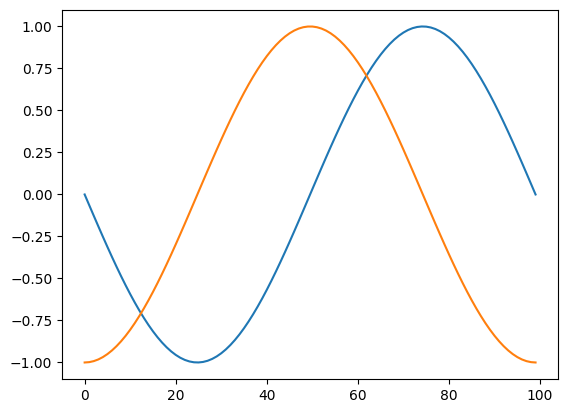

In [24]:
x = np.linspace(-np.pi,np.pi,100)
x = torch.tensor(x, requires_grad=True)
y = torch.sin(x)
plt.plot(y.detach().numpy())
loss = y.sum()
loss.backward()
plt.plot(x.grad)

## Assiginment  
これでPyTorchの基本は理解できただろう。  
データパイプライン、線形モデル、損失関数、勾配降下オプティマイザなど、メソッド全体をゼロから実装してみよう。  
最近のディープラーニングフレームワークは、これらの作業のほぼすべてを自動化することができるが、ゼロから実装することは、自分が何をしているのかを本当に理解していることを確認する唯一の方法である。  
さらに、モデルをカスタマイズしたり、独自のレイヤーや損失関数を定義したりするときに、ボンネットの下でどのように動作するかを理解していると便利だ。  
このセクションでは、テンソルと自動微分だけに頼ることにする。
その後、ディープラーニング・フレームワークのベルやホイッスルを活用した、より簡潔な実装を紹介する。
物事を単純にするために、加法的ノイズを持つ線形モデルに従って人工データセットを構築する。我々の課題は、データセットに含まれる有限の例集合を使って、このモデルのパラメータを回復することである。データを低次元に保ち、簡単に可視化できるようにする。以下のコードでは、それぞれ標準正規分布からサンプリングされた2つの特徴からなる、1000の例を含むデータセットを生成します。したがって、合成データセットは行列  
$\mathbf{X} \in \mathbb{R}^{1000 \times 2}$.

データセットを生成する真のパラメータは $w$ =[2,-3.4]⊤ である。
$s$=4.2
 合成ラベルは、ノイズ項 $\epsilon$:を持つ以下の線形モデルに従って割り当てられる。  

$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon.$$

In [44]:
def synthetic_data(w,b,num_examles):
    X = torch.normal(0,1,(num_examles,len(w)))
    y = torch.matmul(X,w)+b
    y += torch.normal(0,1,y.shape)
    return X, y.reshape((-1,1))

In [45]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b,1000)

In [46]:
print("features",features[0],"\nlabels",labels[0])

features tensor([0.0306, 0.0151]) 
labels tensor([5.5552])


In [47]:
print("features shape",features.shape,"\nlabels shape",labels.shape)

features shape torch.Size([1000, 2]) 
labels shape torch.Size([1000, 1])


#### Reading Dataset
モデルの学習は、データセットを何度も通過させ、一度に1つのミニバッチを取得し、それを使ってモデルを更新することである。このプロセスは機械学習アルゴリズムのトレーニングの基本なので、データセットをシャッフルしてミニバッチでアクセスするユーティリティ関数を定義する価値がある。

以下のコードでは、data_iter関数を定義して、この機能の可能な実装の1つを示す。この関数は、バッチサイズ、特徴量の行列、ラベルのベクトルを受け取り、バッチサイズのミニバッチを生成する。各ミニバッチは、特徴とラベルのタプルで構成される。

In [48]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

一般的に、並列処理が得意なGPUハードウェアを活用するために、適度な大きさのミニバッチを使用したいことに注意してください。GPUは並列処理に優れている。各例は並列にモデルを通過させることができ、各例に対する損失関数の勾配も並列に取ることができるため、GPUを使えば、1つの例を処理するのにかかる時間とほとんど変わらない時間で、数百の例を処理することができる。

直感を養うために、最初の少量のデータ例を読んで印刷してみよう。各ミニバッチの特徴の形状から、ミニバッチのサイズと入力特徴の数がわかる。同様に、ラベルのミニバッチはbatch_sizeで与えられる形状を持つ。

In [49]:
batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X,"\n",y)
    break

tensor([[-1.1500,  0.7226],
        [-1.0277, -0.9919],
        [-0.2841, -0.1064],
        [-0.0679, -2.2454],
        [ 1.2986, -0.7111],
        [ 0.1076,  2.2007],
        [-0.3311, -1.3217],
        [ 0.3486,  0.5818],
        [ 0.9562,  0.3075],
        [ 1.2916, -1.6977]]) 
 tensor([[-0.8846],
        [ 4.4617],
        [ 4.6612],
        [11.1013],
        [ 8.4052],
        [-2.8027],
        [ 8.3110],
        [ 4.1519],
        [ 4.5536],
        [11.0025]])


#### Initializing Model Parameters
ミニバッチ確率勾配降下法によるモデルのパラメータの最適化を始める前に、まずパラメータが必要です。以下のコードでは、平均0、標準偏差0.01の正規分布から乱数をサンプリングして重みを初期化し、バイアスを0に設定します。

In [50]:
w = None
b = None
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [51]:
type(torch.normal(0,0.01,size=(2,1)))

torch.Tensor

#### Difining the Model  
次に、モデルを定義し、その入力とパラメータをその出力に関連付けなければなりません。線形モデルの出力を計算するために、単純に入力特徴量𝐱とモデル重み𝐰の行列ベクトル積を取ることを思い出してください。
  とモデルの重み 𝐰
  を計算し、オフセット$b$を各例に加えます。
  を各例に加えます。

これは、練習問題3で実装したものと全く同じです。

In [52]:
def linear(X,W,b):

    return torch.matmul(X,W)+b


In [53]:
X_ = torch.Tensor([[0.1, 0.2, 0.3]])
W_ = torch.Tensor([[0.1, 0.2, 0.3]]).T
b_ = torch.Tensor([-0.5])
linear(X_,W_,b_)

tensor([[-0.3600]])

####Defining the Loss Function
モデルを更新するには損失関数の勾配を取る必要があるので、まず損失関数を定義する必要がある。ここでは2乗損失関数を使う。  
$$
L^{(i)} = \frac{1}{2} (\hat{y}^{(i)}-y^{(i)})^2
$$


In [54]:
def squared_loss(y_hat,y):
    return ((y_hat-y.reshape(y_hat.shape))**2/2).mean()

In [55]:
y = torch.tensor([2, 0.4, 1.1, 2.1])
y_hat = torch.tensor([[2.1, 0.3, 1.2, 2.5]])

In [56]:
squared_loss(y_hat,y)

tensor(0.0238)

#### Defining the Optimizetion Algorithm
線形回帰には閉形式解があるが、この機会にミニバッチ確率的勾配降下の最初の実例を紹介しよう。

各ステップにおいて、データセットからランダムに引いた1つのミニバッチを使って、パラメータに対する損失の勾配を推定する。次に、損失を減らす方向にパラメータを更新する。以下のコードは、パラメータセット、学習率、バッチサイズが与えられると、ミニバッチ確率的勾配降下更新を適用する。更新ステップのサイズは学習率lrによって決定される。損失はミニバッチの例に対する合計として計算されるので、バッチサイズ(batch_size)によってステップサイズを正規化し、典型的なステップサイズの大きさがバッチサイズの選択に大きく依存しないようにします。

In [57]:
def sgd(params, lr, batch_size):
    """  Minibatch stochastic gradient descent """
    lr = lr / batch_size
    with torch.no_grad():
        for param in params:
            """
            TODO: perform a step gradient descent
                  param = param - lr * grad
            """
            param -= lr * param.grad
#             raise NotImplementedError
            param.grad.zero_()

#### Training
これですべてのパーツが揃ったので、メインのトレーニング・ループを実装する準備ができた。ディープラーニングのキャリアを通じて、ほぼ同じトレーニングループを何度も何度も見ることになるので、このコードを理解することは非常に重要だ。

各反復で、トレーニング例のミニバッチを取得し、予測セットを得るためにモデルに通します。損失を計算した後、ネットワークを通して後方パスを開始し、各パラメータに関する勾配を保存する。最後に、最適化アルゴリズム sgd を呼び出して、モデルパラメータを更新します。

In [58]:
lr = 0.03
num_epochs = 20
net = linear
loss = squared_loss
loss_list=[]
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        loss_list.append(float(train_l.mean()))
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 9.711597
epoch 2, loss 5.604959
epoch 3, loss 3.334260
epoch 4, loss 2.080309
epoch 5, loss 1.388042
epoch 6, loss 1.005036
epoch 7, loss 0.793045
epoch 8, loss 0.676391
epoch 9, loss 0.612118
epoch 10, loss 0.575896
epoch 11, loss 0.556079
epoch 12, loss 0.544983
epoch 13, loss 0.538864
epoch 14, loss 0.535591
epoch 15, loss 0.533765
epoch 16, loss 0.532712
epoch 17, loss 0.532193
epoch 18, loss 0.531886
epoch 19, loss 0.531689
epoch 20, loss 0.531606


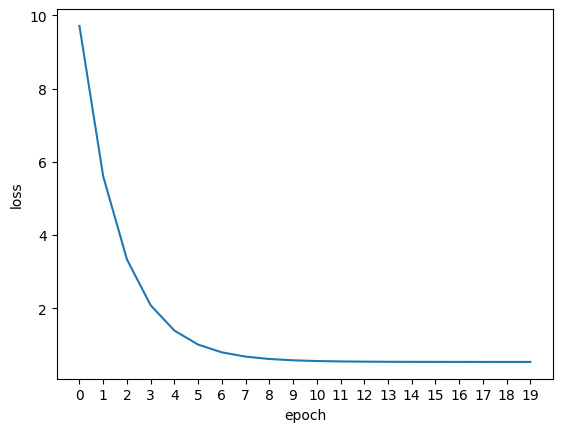

In [65]:
x_label = np.arange(20)
plt.plot(loss_list)
plt.xticks(x_label)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [49]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-0.0093,  0.0565], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0048], grad_fn=<RsubBackward1>)


In [50]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

assert (true_w - w.reshape(true_w.shape)).abs().mean() < 0.05
assert (true_b - b).abs() < 0.05

